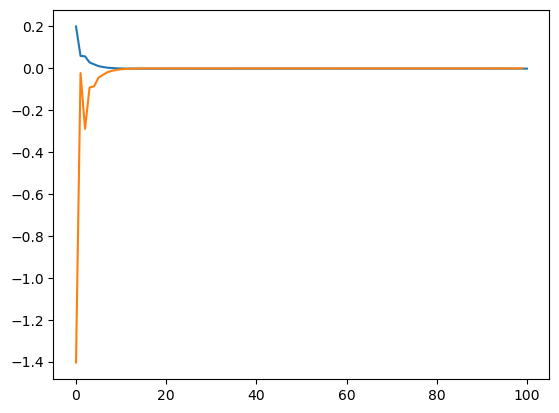

In [32]:
class PIDController:  
    def __init__(self, kp, ki, kd, setpoint=0):  
        self.kp = kp  
        self.ki = ki  
        self.kd = kd  
        self.setpoint = setpoint  
        self.integral = 0  
        self.previous_error = 0  

    def update(self, measurement, dt):  
        # Calculate error  
        error = self.setpoint - measurement  

        # Proportional term  
        p = self.kp * error  

        # Integral term  
        self.integral += error * dt  
        i = self.ki * self.integral  

        # Derivative term  
        derivative = (error - self.previous_error) / dt  
        d = self.kd * derivative  

        # Update previous error  
        self.previous_error = error  

        # Calculate control output  
        output = p + i + d  
        return output  

def simulate_pid(total_time, steps, kp, ki, kd, initial_value, setpoint):  
    # Create a PID controller instance  
    pid = PIDController(kp, ki, kd, setpoint=setpoint)  

    # Calculate time step  
    dt = total_time / steps  

    # Initialize the current value  
    current_value_list = [initial_value]
    current_value = initial_value  

    # keep the control signal to plot
    control_signal = []
    # Simulation loop  
    for step in range(steps):  
        # Update the PID controller  
        control_signal.append(pid.update(current_value, dt))  

        # Apply the control signal
        current_value += control_signal[step] * dt
        current_value_list.append(current_value)
    return current_value_list, control_signal



        
if __name__ == "__main__":  
    # Simulation parameters  
    total_time = 10.0  # Total simulation time in seconds  
    steps = 100  # Number of simulation steps  

    # PID coefficients  
    kp = 5.0  
    ki = 0.2  
    kd = 0.2  

    # Initial conditions  
    initial_value = 0.2  # Initial measurement  
    setpoint = 0  # Desired setpoint  

    # Run the simulation  
    current_value_list, control_signal = simulate_pid(total_time, steps, kp, ki, kd, initial_value, setpoint)  

    # Plot the results
    import matplotlib.pyplot as plt
    plt.plot(current_value_list)
    plt.plot(control_signal)
    plt.show()
